In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

1.	Do a simple EDA for the dataset. 

In [2]:
data = pd.read_csv("BlackFriday.csv")

In [3]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,1.000791e+06,8.433700,0.405300,5.292800,9.796359,12.811144,9152.487700
std,4.402229e+02,6.660333,0.490975,3.660739,5.055550,4.057049,4881.543001
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1.000403e+06,3.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,1.000817e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8021.500000
75%,1.001172e+06,15.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,1.001530e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


The count values of "Product_Category_2" and "Product_Category_3" are lower than the other features. It means that there are lots of missing values in these twe columns.

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


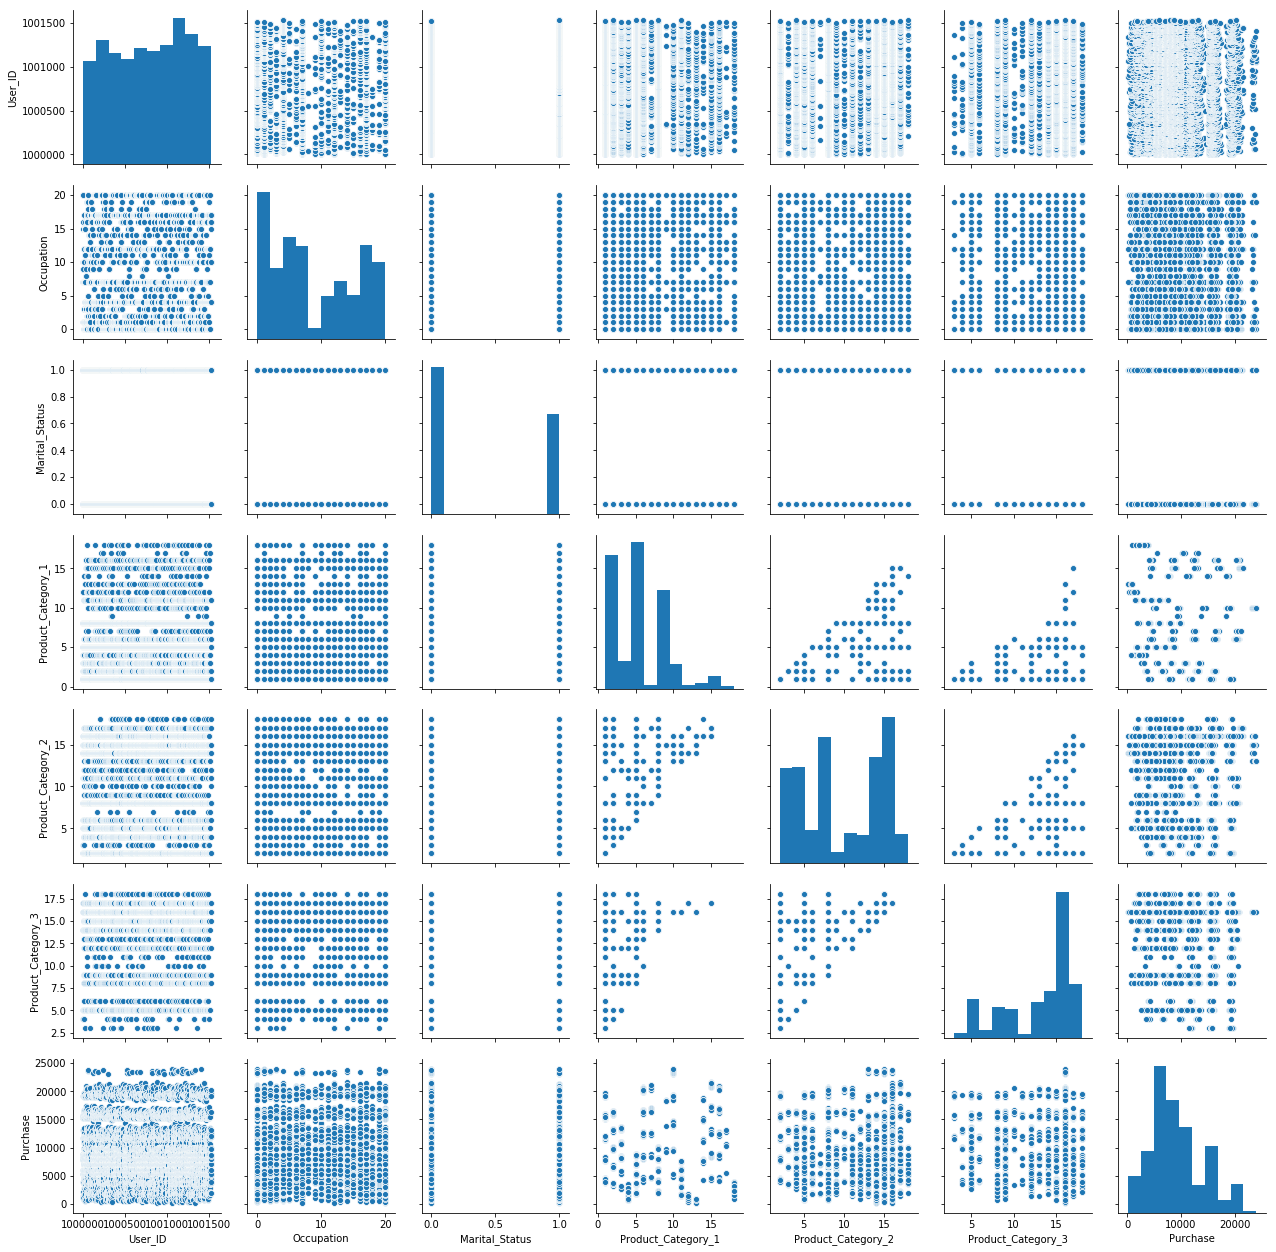

In [4]:
sns.pairplot(data)

From the above plot, the correlation between "Purchase" and the other features seems very low since the points on plot are dramatically discrete.

It is reasonable to speculate that the R square will be very small since the low correlation between the independent variables and the dependent variables.

2.	Preprocess the data, e.g. missing data and categorical data, etc.

Turn the catogory data such as 'Gender Age','Occupation','age','City_Category' and 'Stay_In_Current_City_Years' into digital data.

Then convert those digital variables into dummy variables.

In [273]:
gender = data.loc[:,"Gender"]

In [274]:
gender.value_counts()

M    7636
F    2364
Name: Gender, dtype: int64

In [275]:
gender_mapping = {'M':1, 'F':0}

In [276]:
data.loc[:,'Gender'] = data.loc[:,'Gender'].map(gender_mapping)

In [277]:
Occupation = data.loc[:,"Occupation"]

In [278]:
Occupation.value_counts()

4     1248
0     1203
7      985
17     795
1      777
20     764
12     618
2      510
16     480
3      447
14     399
10     370
6      271
11     216
15     192
19     187
13     167
5      131
9      104
18      85
8       51
Name: Occupation, dtype: int64

In [279]:
Occupation_1 = pd.get_dummies(data.loc[:,'Occupation'])[1]
Occupation_2 = pd.get_dummies(data.loc[:,'Occupation'])[2]
Occupation_3 = pd.get_dummies(data.loc[:,'Occupation'])[3]
Occupation_4 = pd.get_dummies(data.loc[:,'Occupation'])[4]
Occupation_5 = pd.get_dummies(data.loc[:,'Occupation'])[5]
Occupation_6 = pd.get_dummies(data.loc[:,'Occupation'])[6]
Occupation_7 = pd.get_dummies(data.loc[:,'Occupation'])[7]
Occupation_8 = pd.get_dummies(data.loc[:,'Occupation'])[8]
Occupation_9 = pd.get_dummies(data.loc[:,'Occupation'])[9]
Occupation_10 = pd.get_dummies(data.loc[:,'Occupation'])[10]
Occupation_11 = pd.get_dummies(data.loc[:,'Occupation'])[11]
Occupation_12 = pd.get_dummies(data.loc[:,'Occupation'])[12]
Occupation_13 = pd.get_dummies(data.loc[:,'Occupation'])[13]
Occupation_14 = pd.get_dummies(data.loc[:,'Occupation'])[14]
Occupation_15 = pd.get_dummies(data.loc[:,'Occupation'])[15]
Occupation_16 = pd.get_dummies(data.loc[:,'Occupation'])[16]
Occupation_17 = pd.get_dummies(data.loc[:,'Occupation'])[17]
Occupation_18 = pd.get_dummies(data.loc[:,'Occupation'])[18]
Occupation_19 = pd.get_dummies(data.loc[:,'Occupation'])[19]
Occupation_20 = pd.get_dummies(data.loc[:,'Occupation'])[20]

In [280]:
city = data.loc[:,"City_Category"]

In [281]:
city.value_counts()

B    3711
A    3346
C    2943
Name: City_Category, dtype: int64

In [282]:
city_mapping = {'A':0, 'B':1, 'C':2}

In [283]:
data.loc[:,'City_Category'] = data.loc[:,'City_Category'].map(city_mapping)

In [284]:
city_B = pd.get_dummies(data.loc[:,'City_Category'])[1]
city_C = pd.get_dummies(data.loc[:,'City_Category'])[2]

In [285]:
stay_year = data.loc[:,"Stay_In_Current_City_Years"]

In [286]:
stay_year.value_counts()

1     3190
3     1891
2     1770
4+    1684
0     1465
Name: Stay_In_Current_City_Years, dtype: int64

In [287]:
stay_year_mapping = {'1':1, '2':2, '3':3, '4+':4, '0':0}

In [288]:
data.loc[:,'Stay_In_Current_City_Years'] = data.loc[:,'Stay_In_Current_City_Years'].map(stay_year_mapping)

In [289]:
stay1 = pd.get_dummies(data.loc[:,'Stay_In_Current_City_Years'])[1]
stay2 = pd.get_dummies(data.loc[:,'Stay_In_Current_City_Years'])[2]
stay3 = pd.get_dummies(data.loc[:,'Stay_In_Current_City_Years'])[3]
stay4plus = pd.get_dummies(data.loc[:,'Stay_In_Current_City_Years'])[4]

In [290]:
age = data.loc[:,"Age"]

In [291]:
age.value_counts()

26-35    3776
18-25    2118
36-45    1961
46-50     752
51-55     690
0-17      378
55+       325
Name: Age, dtype: int64

In [292]:
age_mapping = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}

In [293]:
data.loc[:,'Age'] = data.loc[:,'Age'].map(age_mapping)

In [294]:
age18 = pd.get_dummies(data.loc[:,'Age'])[1]
age26 = pd.get_dummies(data.loc[:,'Age'])[2]
age36 = pd.get_dummies(data.loc[:,'Age'])[3]
age46 = pd.get_dummies(data.loc[:,'Age'])[4]
age51 = pd.get_dummies(data.loc[:,'Age'])[5]
age55plus = pd.get_dummies(data.loc[:,'Age'])[6]

Check whether the data contains missing values.

In [295]:
data.loc[:,'Gender'].isnull().sum()

0

In [296]:
data.loc[:,'Age'].isnull().sum()

0

In [297]:
data.loc[:,'Occupation'].isnull().sum()

0

In [298]:
data.loc[:,'City_Category'].isnull().sum()

0

In [299]:
data.loc[:,'Stay_In_Current_City_Years'].isnull().sum()

0

In [300]:
data.loc[:,'Marital_Status'].isnull().sum()

0

In [301]:
data.loc[:,'Product_Category_1'].isnull().sum()

0

In [302]:
data.loc[:,'Product_Category_2'].isnull().sum()

3243

In my opinion, the reason why the column "Product_Category_2" leaves blank is that the consumer did not buy anything in category 2.

Hence, I can simply fill the blanks with 0 according to the previous speculation.

In [303]:
data.loc[:,'Product_Category_3'].isnull().sum()

7003

The missing value problem in category 3 is close to the one in catogory 2.

Thus, the treatment to the blanks in category 3 is the same as the one in category 2.

In [304]:
data = data.replace(np.NaN, 0)

drop User_ID and Product_ID.

Also, 'Age', 'City_Category', 'Stay_In_Current_City_Years' and 'Occupation' should be replaced by the dummy variables.

In [305]:
cutdata = data.drop(["User_ID", "Product_ID", "Age", "City_Category", "Stay_In_Current_City_Years", "Occupation"], axis = 1)

In [306]:
cutdata.insert(0,"city_B", city_B)
cutdata.insert(0,"city_C", city_C)
cutdata.insert(0,"stay1", stay1)
cutdata.insert(0,"stay2", stay2)
cutdata.insert(0,"stay3", stay3)
cutdata.insert(0,"stay4+", stay4plus)
cutdata.insert(0,"age18", age18)
cutdata.insert(0,"age26", age26)
cutdata.insert(0,"age36", age36)
cutdata.insert(0,"age46", age46)
cutdata.insert(0,"age51", age51)
cutdata.insert(0,"age55+", age55plus)
cutdata.insert(0,"occupation1", Occupation_1)
cutdata.insert(0,"occupation2", Occupation_2)
cutdata.insert(0,"occupation3", Occupation_3)
cutdata.insert(0,"occupation4", Occupation_4)
cutdata.insert(0,"occupation5", Occupation_5)
cutdata.insert(0,"occupation6", Occupation_6)
cutdata.insert(0,"occupation7", Occupation_7)
cutdata.insert(0,"occupation8", Occupation_8)
cutdata.insert(0,"occupation9", Occupation_9)
cutdata.insert(0,"occupation10", Occupation_10)
cutdata.insert(0,"occupation11", Occupation_11)
cutdata.insert(0,"occupation12", Occupation_12)
cutdata.insert(0,"occupation13", Occupation_13)
cutdata.insert(0,"occupation14", Occupation_14)
cutdata.insert(0,"occupation15", Occupation_15)
cutdata.insert(0,"occupation16", Occupation_16)
cutdata.insert(0,"occupation17", Occupation_17)
cutdata.insert(0,"occupation18", Occupation_18)
cutdata.insert(0,"occupation19", Occupation_19)
cutdata.insert(0,"occupation20", Occupation_20)

In [307]:
cutdata.head(5)

,occupation20,occupation19,occupation18,occupation17,occupation16,occupation15,occupation14,occupation13,occupation12,occupation11,...,stay2,stay1,city_C,city_B,Gender,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0.0,0.0,8370
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,6.0,14.0,15200
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,12,0.0,0.0,1422
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,12,14.0,0.0,1057
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,8,0.0,0.0,7969


In [308]:
Y = cutdata['Purchase']

In [309]:
cutdata = cutdata.drop(['Purchase'], axis = 1)

3.	Do the multiple linear regression with all variables. What is R2, AIC and BIC of the model? 

In [310]:
from sklearn import linear_model
import statsmodels.api as sm

In [311]:
regr = linear_model.LinearRegression()
regr = regr.fit(cutdata, Y)

In [312]:
print(regr.intercept_,regr.coef_)

9766.98436870497 [ -732.08532337  -724.66262802 -1256.47416827   246.68731184
  -141.25351604   437.67134282   213.33759872  -162.41761211
   160.96587495   279.93450872  -582.57928904   754.92009833
   427.55617764  -419.67333114   659.39060616   446.82129654
   -26.52692832    90.86994831  -293.03598493  -324.81813315
  -603.11613864    -3.318095    -332.6435902   -333.28180993
  -408.25789747  -682.82112899   270.28965875    11.08541875
   417.85767147   279.62476694   745.55239521   199.88393014
   561.23787904   -71.01087525  -315.14218231    14.42845989
   148.07084914]


In [313]:
cutdata = sm.add_constant(cutdata)
model = sm.OLS(Y,cutdata).fit()
model.summary()

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     47.04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          5.28e-314
Time:                        16:21:36   Log-Likelihood:                -98316.
No. Observations:               10000   AIC:                         1.967e+05
Df Residuals:                    9962   BIC:                         1.970e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9766.9844    523.043     18.673      0.000    8741.713    1.08e+04
occupation20        -732.0853    213.557     -3.428      0.001   -1150.701    -313.470
occupation19        -724.6626    364.436     -1.988      0.047   -1439.032     -10.294
occupation18       -1256.4742    515.656     -2.437      0.015   -2267.264    -245.684
occupation17         246.6873    213.500      1.155      0.248    -171.815     665.190
occupation16        -141.2535    250.531     -0.564      0.573    -632.345     349.838
occupation15         437.6713    353.918      1.237      0.216    -256.080    1131.422
occupation14         213.3376    264.507      0.807      0.420    -305.149     731.824
occupation13        -162.4176    401.240     -0.405      0.686    -948.928     624.093
occupation12         160.9659    227.031      0.709      0.478    -284.060     605.992
occupation11         279.9345    338.326      0.827      0.408    -383.253     943.122
occupation10        -582.5793    505.229     -1.153      0.249   -1572.930     407.771
occupation9          754.9201    472.291      1.598      0.110    -170.867    1680.707
occupation8          427.5562    657.235      0.651      0.515    -860.757    1715.870
occupation7         -419.6733    198.965     -2.109      0.035    -809.684     -29.662
occupation6          659.3906    309.909      2.128      0.033      51.907    1266.874
occupation5          446.8213    421.331      1.061      0.289    -379.072    1272.715
occupation4          -26.5269    204.147     -0.130      0.897    -426.696     373.642
occupation3           90.8699    253.087      0.359      0.720    -405.232     586.972
occupation2         -293.0360    240.292     -1.219      0.223    -764.057     177.985
occupation1         -324.8181    211.893     -1.533      0.125    -740.171      90.534
age55+              -603.1161    563.935     -1.069      0.285   -1708.542     502.309
age51                 -3.3181    531.055     -0.006      0.995   -1044.294    1037.657
age46               -332.6436    527.769     -0.630      0.529   -1367.178     701.891
age36               -333.2818    503.899     -0.661      0.508   -1321.027     654.463
age26               -408.2579    497.137     -0.821      0.412   -1382.747     566.232
age18               -682.8211    488.646     -1.397      0.162   -1640.665     275.023
stay4+               270.2897    167.193      1.617      0.106     -57.443     598.022
stay3                 11.0854    160.360      0.069      0.945    -303.252     325.423
stay2                417.8577    162.433      2.572      0.010      99.456     736.260
stay1                279.6248    146.212      1.912      0.056      -6.981     566.230
city_C               745.5524    120.021      6.212      0.000     510.287     980.818
city_B               199.8839    111.5

R square = 0.149

Adjusted R square = 0.146

AIC: 1.967e+05

BIC: 1.970e+05

4.	Show the residuals plots against the fitted response variables. What patterns you observe? 

In [314]:
ypred = model.predict(cutdata)

In [315]:
Residual = Y-ypred

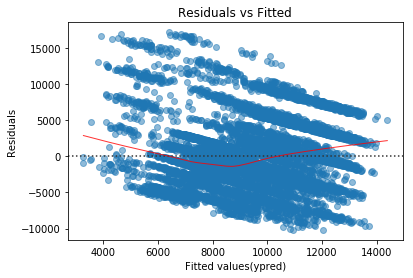

In [316]:
plot_1 = plt.figure()
plot_1.axes[0] = sns.residplot(ypred,Residual , data=cutdata, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_1.axes[0].set_title('Residuals vs Fitted')
plot_1.axes[0].set_xlabel('Fitted values(ypred)')
plot_1.axes[0].set_ylabel('Residuals');

the bow-shaped line in red indicates that we are failing to capture some of the non-linear features of the model. In other words, the variance in the data might be better captured using the square of one or more of the features.

Text(0, 0.5, 'Frequencies')

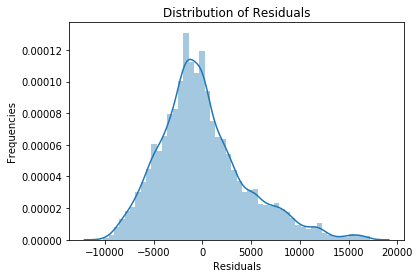

In [317]:
plot_2 = plt.figure()
plot_2.axes[0] = sns.distplot(Residual)
plot_2.axes[0].set_title('Distribution of Residuals')
plot_2.axes[0].set_xlabel('Residuals')
plot_2.axes[0].set_ylabel('Frequencies')